<a href="https://colab.research.google.com/github/ZeerakJawed/DiceRoller/blob/master/MlPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given clinical parameters about a patient, can we predict whether our not they have heart disease. Given that the target is binary it means it is a binary classification problem

Popular algorithms that can be used for binary classification include:

Logistic Regression
k-Nearest Neighbors
Decision Trees
Support Vector Machine
Naive Bayes

###We perform Exploratory Data Analysis to gain insight into our data and potentially spot any issues. Thus performing Data cleaning and then Data Engineering to scale and standardize the variables so our data is ready for our model.





### importing dataset and EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("./Clean_heart_data.csv")
df.drop(columns = "Unnamed: 0", inplace = True)
#importing the file from drive into a dataframe

In [ ]:
df.info()
df.shape
# 1018 entries and all entries present hence no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1018 non-null   int64  
 1   sex                  1018 non-null   int64  
 2   chest_pain_type      1018 non-null   int64  
 3   resting_bp_s         1018 non-null   int64  
 4   cholesterol          1018 non-null   int64  
 5   fasting_blood_sugar  1018 non-null   int64  
 6   resting_ecg          1018 non-null   int64  
 7   max_heart_rate       1018 non-null   int64  
 8   exercise_angina      1018 non-null   int64  
 9   oldpeak              1018 non-null   float64
 10  ST_slope             1018 non-null   int64  
 11  target               1018 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 95.6 KB


(1018, 12)

In [ ]:
df.describe()
#range of each variable is different, objective functions might not work propeerly for som ML algorithms.
#Normalization is needed.

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,53.294695,0.734774,3.165029,132.571709,245.906680,0.162083,0.740668,142.730845,0.370334,0.939194,1.586444,0.468566
std,9.415441,0.441670,0.953323,17.451133,57.244599,0.368708,0.898779,24.511837,0.483131,1.093669,0.603898,0.499256
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,161.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
df.target.value_counts()

0    541
1    477
Name: target, dtype: int64

In [ ]:
#splitting categorical and continous features into seperate variables
categorical_features = []
continous_features = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_features.append(column)
    else:
        continous_features.append(column)

In [ ]:
categorical_features

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_ecg',
 'exercise_angina',
 'ST_slope',
 'target']

###CHECKING VARIOUS ATTRIBUTES

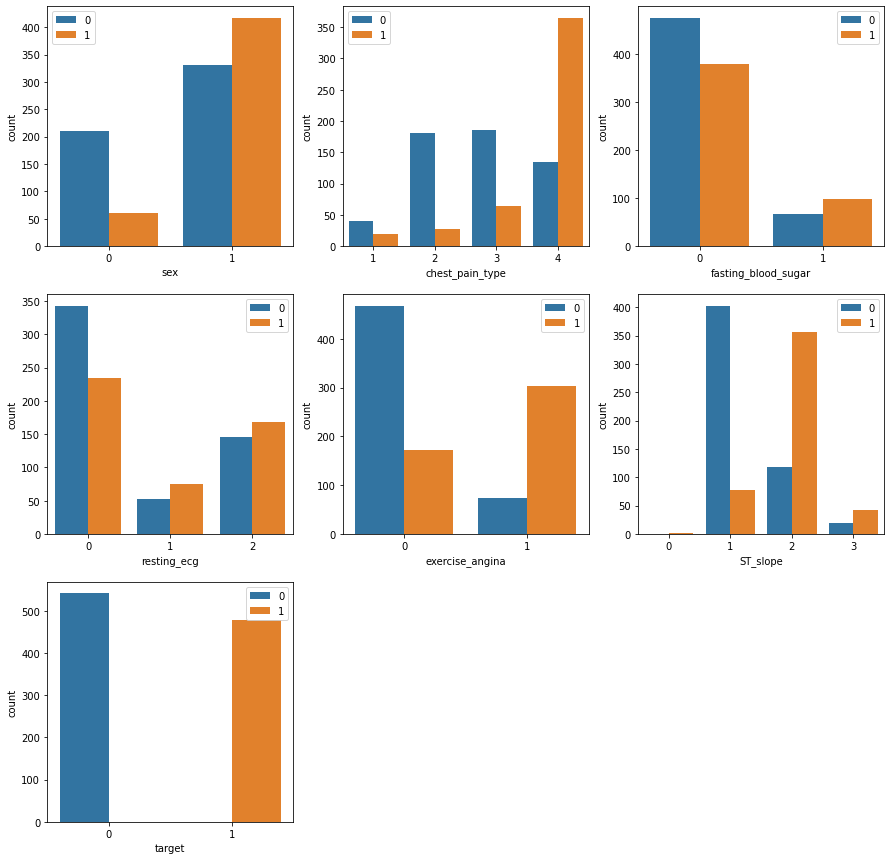

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x = column, hue = "target", data = df)
    plt.legend()
    plt.xlabel(column)

###notes on data
cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.

restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.

exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)

slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.

thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


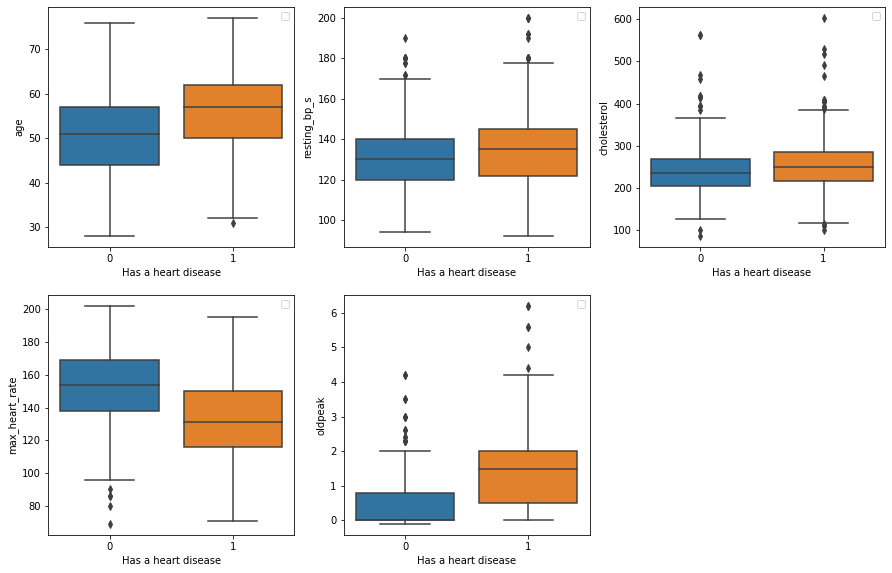

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x = "target", y = column, data = df)
    plt.legend()
    plt.xlabel("Has a heart disease")
plt.show()

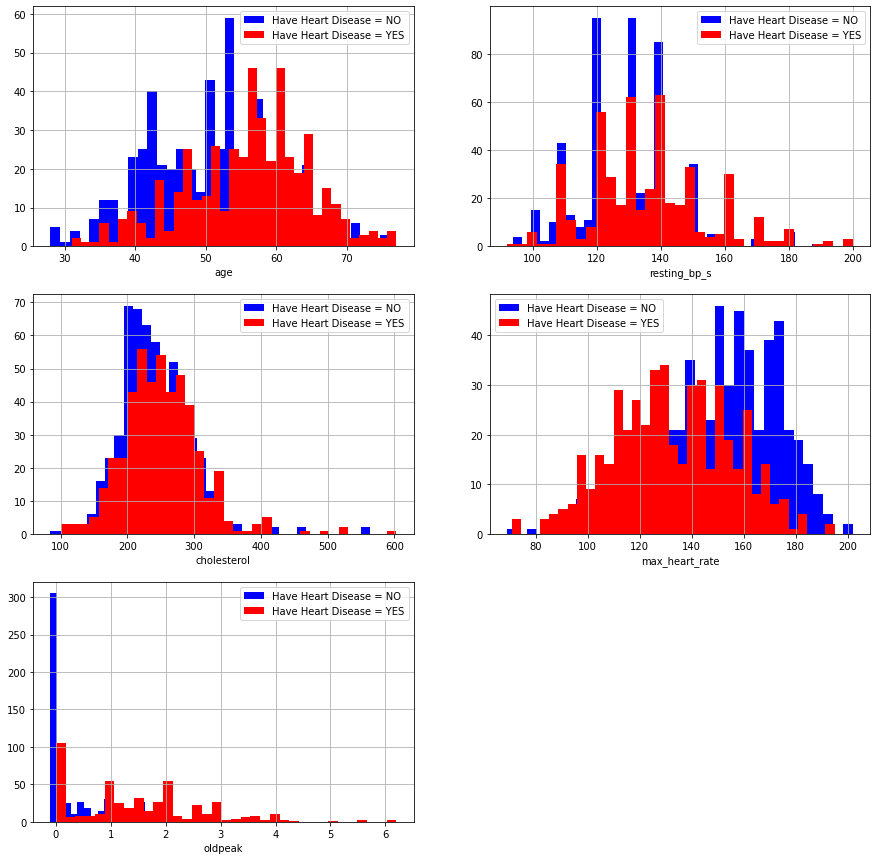

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_features, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO')
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES')
    plt.legend()
    plt.xlabel(column)

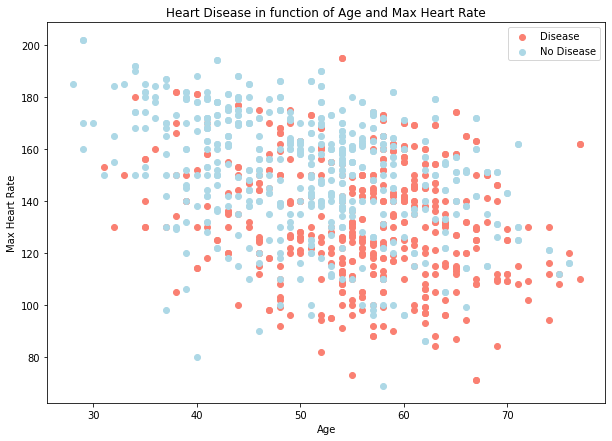

In [ ]:
# Create another figure
plt.figure(figsize=(10, 7))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.max_heart_rate[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.max_heart_rate[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

#max heart rate seems to increase the heart disease. Explore how age and max heart rate correlate with target variable.

###notes
trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

chol {serum cholestoral in mg/dl} : above 200 is cause for concern.

thalach {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.

oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

UNDERSTANDING THE DATA WITH CORRELATION MATRIX.

- Corr matrix convinienelty summarises the correllation between all variables in a dataset.

- Detect any multicollinearity which can affect interprating the results of regression methods.

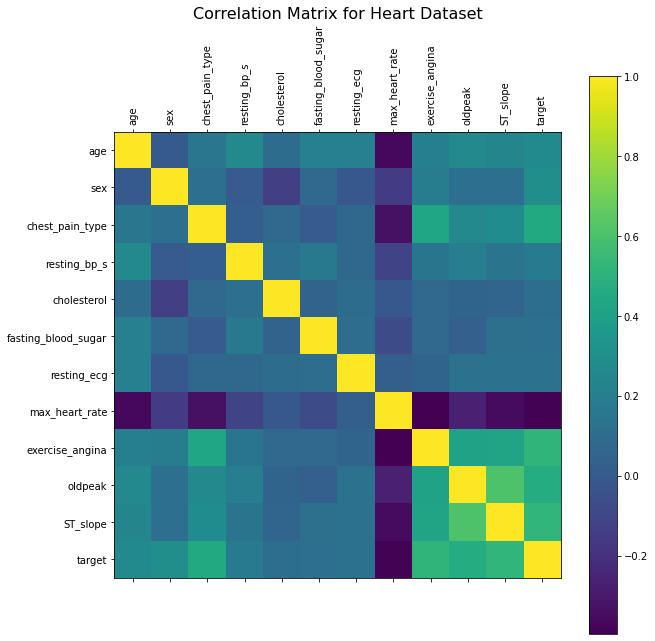

In [ ]:
rcParams['figure.figsize']= 8,10
plt.matshow(df.corr())
plt.xticks(np.arange(df.shape[1]),df.columns, rotation = 90)
plt.yticks(np.arange(df.shape[1]),df.columns)
plt.colorbar()
plt.title('Correlation Matrix for Heart Dataset', fontsize=16);
#no one feature is highly correlated with the target value


###notes
Chest pain type, excersice angina, oldpeak and ST slope had fairly higher correlation with target variable. hence, higher value here will correspond to a heart disease.

scatter plot shows as age goes up max heart rate declines.

Histogram to see distribution of features and labels.

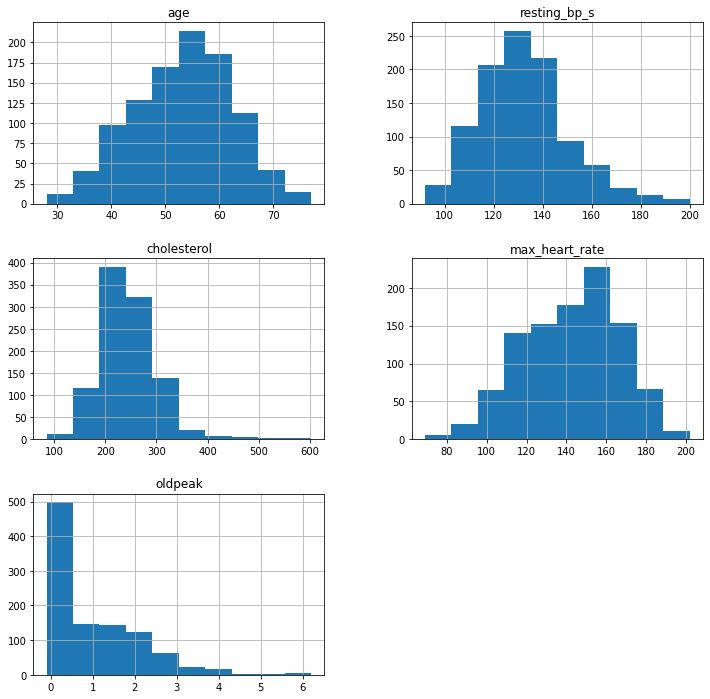

In [ ]:
df[continous_features].hist() # different ranges, need scaling.
plt.show()

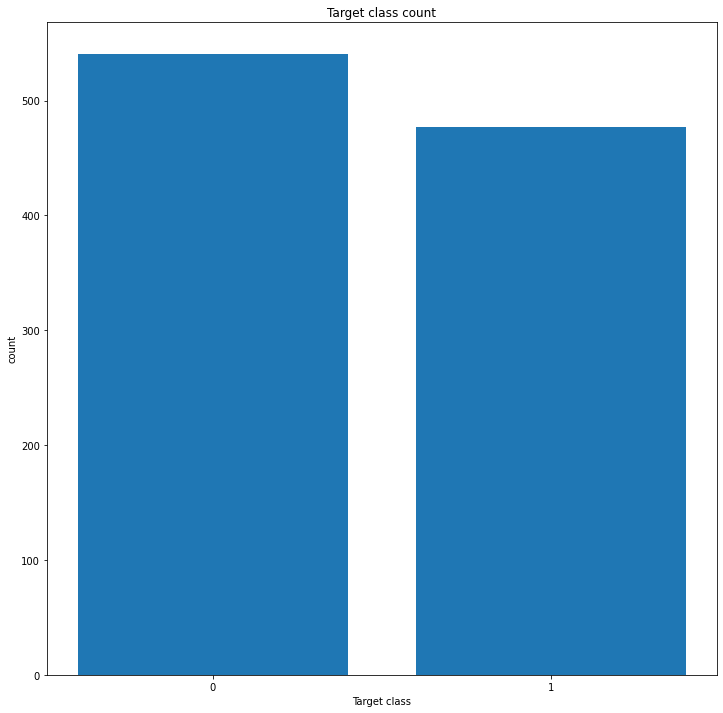

In [ ]:
# visualising the target variable
rcParams['figure.figsize']= 12,12
plt.bar(df['target'].unique(), df['target'].value_counts())
plt.xlabel('Target class')
plt.ylabel('count')
plt.title('Target class count')
plt.xticks([0,1])
plt.show()

###Scaling the data

notes: standardization to reduces the effects of outlier.

In [ ]:
from sklearn.preprocessing import StandardScaler #library for standardscaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
#encode the categorical coloumns into dummy and scale remainder coloumns
df = pd.get_dummies(df,columns=['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'ST_slope'])
scaler = StandardScaler()
scaled_coloumns = ['age', 'resting_bp_s', 'cholesterol', 'oldpeak','max_heart_rate']
df[scaled_coloumns] = scaler.fit_transform(df[scaled_coloumns])

In [ ]:
df.head()

,age,resting_bp_s,cholesterol,max_heart_rate,oldpeak,target,sex_0,sex_1,chest_pain_type_1,chest_pain_type_2,...,fasting_blood_sugar_1,resting_ecg_0,resting_ecg_1,resting_ecg_2,exercise_angina_0,exercise_angina_1,ST_slope_0,ST_slope_1,ST_slope_2,ST_slope_3
0,-1.412704,0.425872,0.753163,1.194669,-0.859178,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
1,-0.456357,1.572492,-1.151883,0.541603,0.055625,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,-1.731486,-0.147439,0.648298,-1.825764,-0.859178,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3,-0.562618,0.311210,-0.557648,-1.417597,0.513026,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.074946,0.999182,-0.889721,-0.846164,-0.859178,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


#MACHINE LEARNING MODEL

In [ ]:

#function to print the analytics of the model
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
x = df.drop('target', axis=1)
y = df.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

### K NEAREST NEIGHBOUR

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

heartKnn_Model = KNeighborsClassifier(n_neighbors=7, p=1, weights = 'uniform')
heartKnn_Model.fit(x_train, y_train)

print_score(heartKnn_Model, x_train, y_train, x_test, y_test, train=True)
print_score(heartKnn_Model, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 89.04%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.901070    0.878698  0.890449    0.889884      0.890575
recall       0.891534    0.889222  0.890449    0.890378      0.890449
f1-score     0.896277    0.883929  0.890449    0.890103      0.890484
support    378.000000  334.000000  0.890449  712.000000    712.000000
_______________________________________________
Confusion Matrix: 
 [[337  41]
 [ 37 297]]

Test Result:
Accuracy Score: 82.68%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.812500    0.846154  0.826797    0.829327      0.828227
recall       0.877301    0.769231  0.826797    0.823266      0.826797
f1-score     0.843658    0.805861  0.826797    0.824759      0.825995
support    163.000000  143.000000  0.826797  306.000000    306.

In [ ]:
# checking training data accuracy seprately
X_trainPred = heartKnn_Model.predict(x_train)
trainingData_acc = accuracy_score(X_trainPred, y_train)
trainingData_acc

#0.6924157303370787 FIRST MODEL default euclidean
#0.7837078651685393 changing distrance to manhattan p = 1


0.8904494382022472

In [ ]:
# checking testing data accuracy seprately

xTest_pred = heartKnn_Model.predict(x_test)
testData_acc = accuracy_score(xTest_pred, y_test)
testData_acc

#0.6176470588235294 FIRST MODEL default is euclidean
# 0.7483660130718954 changing distrance to manhattan p = 1


0.826797385620915

In [ ]:
training_score = []
test_score = []
k_neighbors = range(1, 30)

for k in k_neighbors:
    model = KNeighborsClassifier(n_neighbors=k, p=1)
    model.fit(x_train, y_train)
    training_score.append(accuracy_score(y_train, model.predict(x_train)))
    test_score.append(accuracy_score(y_test, model.predict(x_test)))

https://www.kaggle.com/code/faressayah/predicting-heart-disease-using-machine-learning/notebook

https://towardsdatascience.com/predicting-presence-of-heart-diseases-using-machine-learning-36f00f3edb2c#:~:text=Machine%20Learning%20can%20play%20an,and%20treatment%20per%20patient%20basis.


#Relation between the number of n neighbours and model score.

Maximum KNN score on the test data: 100.00%


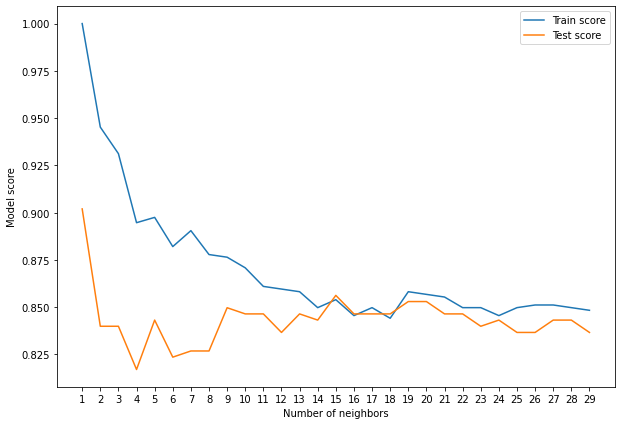

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(k_neighbors, training_score, label="Train score")
plt.plot(k_neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 30, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(training_score)*100:.2f}%")

trade off between:

(large k) oversimplification and dominance of large classes

(small k) tendency to overfitting and sensitivity to noise

#IMPROVING AGAIN

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
# find the best score
g_res.best_score_

0.8974754458745524

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 11, weights = 'distance',metric = 'manhattan')
knn.fit(x_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [ ]:
# get a prediction
y_hat = knn.predict(x_train)
y_knn = knn.predict(x_test)

In [ ]:
print_score(knn, x_train, y_train, x_test, y_test, train=False)

Test Result:
Accuracy Score: 92.81%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.917160    0.941606  0.928105    0.929383      0.928584
recall       0.950920    0.902098  0.928105    0.926509      0.928105
f1-score     0.933735    0.921429  0.928105    0.927582      0.927984
support    163.000000  143.000000  0.928105  306.000000    306.000000
_______________________________________________
Confusion Matrix: 
 [[155   8]
 [ 14 129]]



In [ ]:
from sklearn import metrics


In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.9281045751633987


https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning/notebook

##Next stage is to utilise a Deep Learning Model and compare its accuracy score to the Machine Learning Model used in this notebook.